<a href="https://colab.research.google.com/github/mannam95/Deep_Learning_Programming/blob/main/Assignment1/Assignment_1_MLP_Srinath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Team Assignment


1.   Srinath Mannam
2.   Meghana Rao
3.   Govind



#Change the directory

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
working_directory = '/content/drive/My Drive/Colab Notebooks/OVGU/Deep_Learning/First_Assignment'
if os.getcwd() !=  working_directory:
  os.chdir(working_directory)
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/OVGU/Deep_Learning/First_Assignment'

#import statements

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

##Check tensorflow version

In [ ]:
tf.__version__

'2.6.0'

#Load Data

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
#Re-shape the dataset and then pass it to the function which creates data into batches
def reset_Data():
  return MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Visualize some images on some training and test data

1


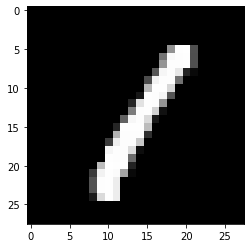

In [ ]:
print(train_labels[3])
plt.imshow(train_images[3], cmap="Greys_r")

4


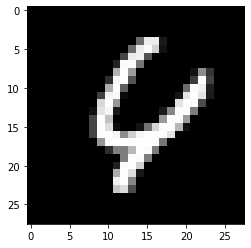

In [ ]:
print(test_labels[121])
plt.imshow(test_images[121], cmap="Greys_r")

#A function that will choose the activation function

In [ ]:
def dynamicActiFunc(actFun, currLogits):
  if actFun == "relu":
    return tf.nn.relu(currLogits)
  elif actFun == "lrelu":
    return tf.nn.leaky_relu(currLogits)
  elif actFun == "sigmoid":
    return tf.nn.sigmoid(currLogits)
  else:
    return tf.nn.relu(currLogits)

#Define a Generic function for training

In [ ]:
def model_Train(_modelConfig, data):
  loss_list = []
  for step in range(_modelConfig["train_steps"]):
      img_batch, lbl_batch = data.next_batch()
      with tf.GradientTape() as tape:
          #loop that will goes forward for every hidden layer
          for ind in range(len(_modelConfig["_weights"])-1):
            if ind == 0:
              hPrevLogits = tf.matmul(img_batch, _modelConfig["_weights"][ind]) + _modelConfig["_biases"][ind]
              hPrevOutput = dynamicActiFunc(_modelConfig["activation_func"], hPrevLogits)
            else :
              hcurrLogits = tf.matmul(hPrevOutput, _modelConfig["_weights"][ind]) + _modelConfig["_biases"][ind]
              hcurrOutput = dynamicActiFunc(_modelConfig["activation_func"], hcurrLogits)
              hPrevOutput = hcurrOutput

          lastInd = len(_modelConfig["_weights"])-1

          #final output layer
          logits = tf.matmul(hcurrOutput, _modelConfig["_weights"][lastInd]) + _modelConfig["_biases"][lastInd]
          xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
              logits=logits, labels=lbl_batch))
          
      grads = tape.gradient(xent, [*_modelConfig["_weights"], *_modelConfig["_biases"]])

      #update weights
      for ind in range(len(_modelConfig["_weights"])):
        _modelConfig["_weights"][ind].assign_sub(_modelConfig["learning_rate"] * grads[ind])
      
      #update biases
      for ind in range(len(_modelConfig["_biases"])):
        _modelConfig["_biases"][ind].assign_sub(_modelConfig["learning_rate"] * grads[ind + len(_modelConfig["_biases"])])

      loss_list.append(xent)
      if not step % 100:
          print(step)
          preds = tf.argmax(logits, axis=1, output_type=tf.int32)
          acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                              tf.float32))
          print("Loss: {} Accuracy: {}".format(xent, acc))

  #Predict for Test Dataset
  for ind in range(len(_modelConfig["_weights"])-1):
      if ind == 0:
        hPrevLogits = tf.matmul(data.test_data, _modelConfig["_weights"][ind]) + _modelConfig["_biases"][ind]
        hPrevOutput = dynamicActiFunc(_modelConfig["activation_func"], hPrevLogits)
      else :
        hcurrLogits = tf.matmul(hPrevOutput, _modelConfig["_weights"][ind]) + _modelConfig["_biases"][ind]
        hcurrOutput = dynamicActiFunc(_modelConfig["activation_func"], hcurrLogits)
        hPrevOutput = hcurrOutput

  lastInd = len(_modelConfig["_weights"])-1
  test_preds = tf.argmax(tf.matmul(hcurrOutput, _modelConfig["_weights"][lastInd]) + _modelConfig["_biases"][lastInd], axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                              tf.float32))
  print("\nTest Accuracy: {}".format(acc))
  return loss_list

#Models Config

##Relu Activation Function

###Define params Model1

In [ ]:
modelConfig1 = {
    "train_steps" : 1000,
    "learning_rate" : 0.1,
    "activation_func" : "relu",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

###Define params Model2

In [ ]:
modelConfig2 = {
    "train_steps" : 2000,
    "learning_rate" : 0.01,
    "activation_func" : "relu",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

###Define params Model3

In [ ]:
modelConfig3 = {
    "train_steps" : 1000,
    "learning_rate" : 0.1,
    "activation_func" : "relu",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 1568], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([1568, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(1568, dtype=np.float32)),
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

###Define params Model4

In [ ]:
modelConfig4 = {
    "train_steps" : 1000,
    "learning_rate" : 0.1,
    "activation_func" : "relu",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 512], minval=-0.15, maxval=0.15, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.15, maxval=0.15, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.15, maxval=0.15, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

##Sigmoid Activation Function

###Define params Model5

In [ ]:
modelConfig5 = {
    "train_steps" : 1000,
    "learning_rate" : 0.1,
    "activation_func" : "sigmoid",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

###Define params Model6

In [ ]:
modelConfig6 = {
    "train_steps" : 2000,
    "learning_rate" : 0.01,
    "activation_func" : "sigmoid",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

###Define params Model7

In [ ]:
modelConfig7 = {
    "train_steps" : 1000,
    "learning_rate" : 0.1,
    "activation_func" : "sigmoid",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 1568], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([1568, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(1568, dtype=np.float32)),
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

###Define params Model8

In [ ]:
modelConfig8 = {
    "train_steps" : 1000,
    "learning_rate" : 0.1,
    "activation_func" : "sigmoid",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 512], minval=-0.15, maxval=0.15, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.15, maxval=0.15, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.15, maxval=0.15, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

#Models Training

##Relu Models Training

In [ ]:
relu_models_Loss = []
print("Model1 Start")
relu_models_Loss.append(model_Train(modelConfig1, reset_Data()))
print("Model1 End")
print("\n")

print("Model2 Start")
relu_models_Loss.append(model_Train(modelConfig2, reset_Data()))
print("Model2 End")
print("\n")

print("Model3 Start")
relu_models_Loss.append(model_Train(modelConfig3, reset_Data()))
print("Model3 End")
print("\n")

print("Model4 Start")
relu_models_Loss.append(model_Train(modelConfig4, reset_Data()))
print("Model4 End")
print("\n")

Model1 Start
0
Loss: 2.381075859069824 Accuracy: 0.0390625
100
Loss: 0.3935798406600952 Accuracy: 0.890625
200
Loss: 0.34569740295410156 Accuracy: 0.890625
300
Loss: 0.3507368564605713 Accuracy: 0.8828125
400
Loss: 0.2547987699508667 Accuracy: 0.9453125
Starting new epoch...
500
Loss: 0.2598559856414795 Accuracy: 0.9140625
600
Loss: 0.2041759192943573 Accuracy: 0.9140625
700
Loss: 0.14646756649017334 Accuracy: 0.96875
800
Loss: 0.15130479633808136 Accuracy: 0.953125
900
Loss: 0.14336666464805603 Accuracy: 0.953125
Starting new epoch...

Test Accuracy: 0.9531999826431274
Model1 End


Model2 Start
0
Loss: 2.3345837593078613 Accuracy: 0.140625
100
Loss: 1.6893761157989502 Accuracy: 0.6484375
200
Loss: 0.969794750213623 Accuracy: 0.8359375
300
Loss: 0.8231353163719177 Accuracy: 0.796875
400
Loss: 0.6319172382354736 Accuracy: 0.8515625
Starting new epoch...
500
Loss: 0.5770711898803711 Accuracy: 0.8515625
600
Loss: 0.4079449474811554 Accuracy: 0.890625
700
Loss: 0.5091657638549805 Accuracy:

##Sigmoid Models Training

In [ ]:
sigmoid_models_Loss = []

print("Model5 Start")
sigmoid_models_Loss.append(model_Train(modelConfig5, reset_Data()))
print("Model5 End")
print("\n")

print("Model6 Start")
sigmoid_models_Loss.append(model_Train(modelConfig6, reset_Data()))
print("Model6 End")
print("\n")

print("Model7 Start")
sigmoid_models_Loss.append(model_Train(modelConfig7, reset_Data()))
print("Model7 End")
print("\n")

print("Model8 Start")
sigmoid_models_Loss.append(model_Train(modelConfig8, reset_Data()))
print("Model8 End")
print("\n")

Model5 Start
0
Loss: 2.4440975189208984 Accuracy: 0.1484375
100
Loss: 2.1389193534851074 Accuracy: 0.3671875
200
Loss: 1.887211799621582 Accuracy: 0.3671875
300
Loss: 1.2644374370574951 Accuracy: 0.7421875
400
Loss: 1.0486950874328613 Accuracy: 0.7421875
Starting new epoch...
500
Loss: 0.8527307510375977 Accuracy: 0.796875
600
Loss: 0.7003545165061951 Accuracy: 0.8125
700
Loss: 0.6440508961677551 Accuracy: 0.84375
800
Loss: 0.49190083146095276 Accuracy: 0.875
900
Loss: 0.3594120144844055 Accuracy: 0.921875
Starting new epoch...

Test Accuracy: 0.8806999921798706
Model5 End


Model6 Start
0
Loss: 2.4826855659484863 Accuracy: 0.09375
100
Loss: 2.293043851852417 Accuracy: 0.1640625
200
Loss: 2.251398801803589 Accuracy: 0.328125
300
Loss: 2.2529797554016113 Accuracy: 0.15625
400
Loss: 2.256352424621582 Accuracy: 0.3125
Starting new epoch...
500
Loss: 2.22582745552063 Accuracy: 0.484375
600
Loss: 2.208690643310547 Accuracy: 0.265625
700
Loss: 2.1870102882385254 Accuracy: 0.3359375
800
Loss:

#visualize the loss

## Relu Loss

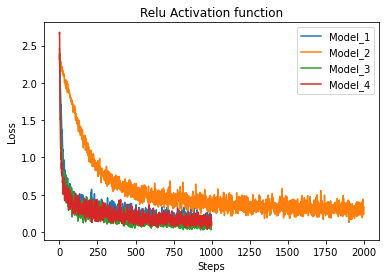

In [ ]:
plt.plot(relu_models_Loss[0], label='Model_1')
plt.plot(relu_models_Loss[1], label='Model_2')
plt.plot(relu_models_Loss[2], label='Model_3')
plt.plot(relu_models_Loss[3], label='Model_4')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Relu Activation function')
plt.legend()
plt.show()

## Sigmoid Loss

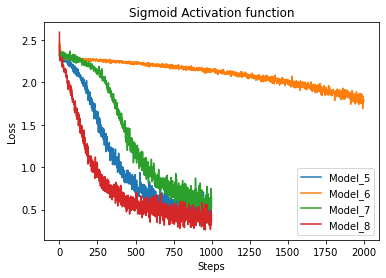

In [ ]:
plt.plot(sigmoid_models_Loss[0], label='Model_5')
plt.plot(sigmoid_models_Loss[1], label='Model_6')
plt.plot(sigmoid_models_Loss[2], label='Model_7')
plt.plot(sigmoid_models_Loss[3], label='Model_8')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Sigmoid Activation function')
plt.legend()
plt.show()

#References


1.   http://blog.ai.ovgu.de/posts/jens/2019/002_tf20_basic_mnist/index.html

